<div style="background-color: #1a1a2e; padding: 15px; border-radius: 20px; border: 1px solid #16213e; max-width: 700px; margin: auto; text-align: center;">
    <h2 style="font-family: 'Helvetica Neue', Arial, sans-serif; color: #e94560; font-size: 30px; margin-bottom: 12px; font-weight: bold;">
      Exploratory Data Analysis (EDA)
    </h2>
</div>

In [5]:
#!pip install plotly

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import datetime as dt

In [2]:
df = pd.read_csv('Emirates_processed_reviews.csv')
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   I flew a return trip DXB-L...      5  2024-08-12   
1  ✅ Trip Verified |   We were 2 people travellin...     10  2024-08-11   
2  Not Verified |   First time flying Emirates, w...      4  2024-07-29   
3  ✅ Trip Verified |  Ground Staff and Service Fa...      5  2024-07-18   
4  Not Verified |  The staff are friendly and the...      1  2024-07-13   

                country  status  \
0  United Arab Emirates    True   
1                 India    True   
2           Netherlands   False   
3             Singapore    True   
4             Hong Kong   False   

                                              corpus  
0  flew return trip dxb li dxb used mile upgrade ...  
1  people travelling together dubai boston sector...  
2  verified first time flying emirate expecting l...  
3  ground staff service failure flight ek careful...  
4  verified staff friendly seat comfortable air t...

### Ratings Distribution:

In [3]:
df['stars'].mean()

5.0275

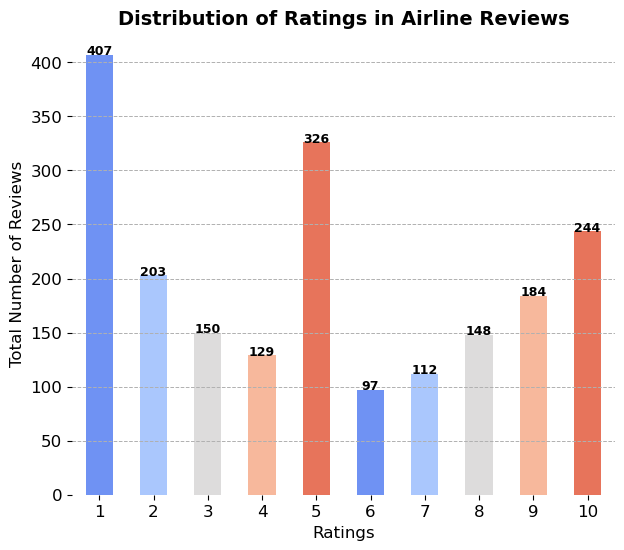

In [4]:
plt.figure(figsize=(7, 6))

ax = df['stars'].value_counts().sort_index().plot(kind="bar",color=sns.color_palette("coolwarm", n_colors=5))

# Add grid lines
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.xlabel("Ratings", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.title("Distribution of Ratings in Airline Reviews", fontsize=14, weight='bold')

# Add annotations to each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='baseline', fontsize=9, color='black', weight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()

<Axes: ylabel='Percentage wise distrubution of stars'>

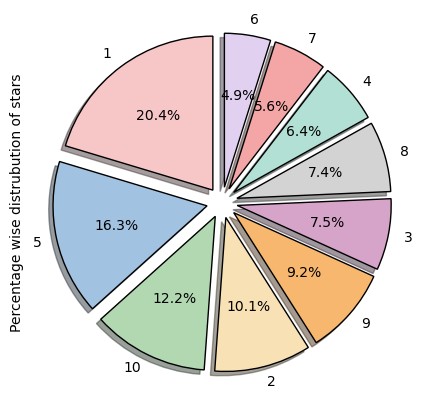

In [5]:
fig = plt.figure(figsize=(6,5))

colors = ['#f7c6c7', '#a2c2e2', '#b2d8b2', '#f7e1b5', '#f7b76f', '#d6a4c9', '#d3d3d3', '#b3e0d4', '#f4a6a6', '#e2d0f0']
wp = {'linewidth':1, "edgecolor":'black'}
tags = df['stars'].value_counts()/df.shape[0]
explode = (0.1,) * len(tags)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of stars')

#### 60% of the travellers have given 5 or less than 5 stars
#### 19% of the travellers have given 9 and 10 stars

### Country-Based Analysis:

In [6]:
print(f"{len(df['country'].unique())} unique countries")

77 unique countries


#### Which countries have the highest and lowest average star ratings?

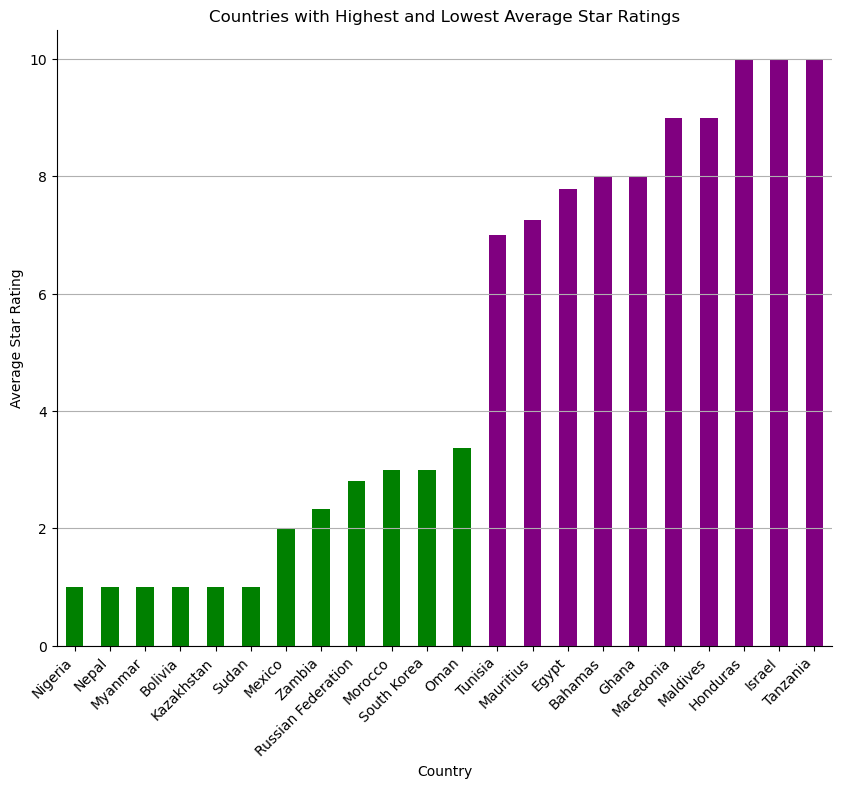

In [7]:
#Calculating average star ratings by country
avg_ratings_by_country = df.groupby('country')['stars'].mean().sort_values()

#Finding the countries with the highest and lowest average ratings
highest_rated_countries = avg_ratings_by_country.tail(10)  # Top 10 highest ratings
lowest_rated_countries = avg_ratings_by_country.head(12)   # Top 12 lowest ratings

# Combining highest and lowest rated countries for plotting
combined_ratings = pd.concat([lowest_rated_countries, highest_rated_countries])

plt.figure(figsize=(10, 8))
combined_ratings.plot(kind='bar', color=['green']*len(lowest_rated_countries) + ['purple']*len(highest_rated_countries))
plt.xlabel('Country')
plt.ylabel('Average Star Rating')
plt.title('Countries with Highest and Lowest Average Star Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### From which country most review comes ?

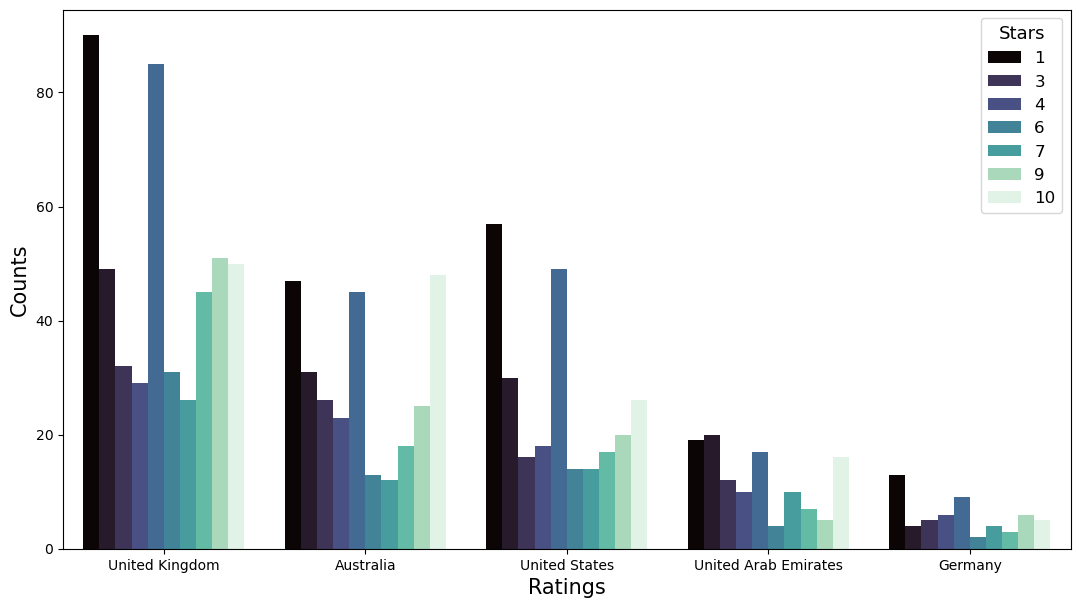

In [8]:
plt.figure(figsize=(13,7))
palette = sns.color_palette("mako", as_cmap=True)
plots= sns.countplot(x='country',hue='stars',data= df, 
                     order=df['country'].value_counts().index[:5],palette=palette)
plt.xlabel("Ratings",fontsize= 15)
plt.ylabel("Counts",fontsize= 15)
plt.legend(title='Stars', title_fontsize='13', fontsize='12')

## Temporal Trends

In [9]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

unique_years = df['date'].dt.year.unique()
print(f'Data collected over years: {unique_years}')

Data collected over years: [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


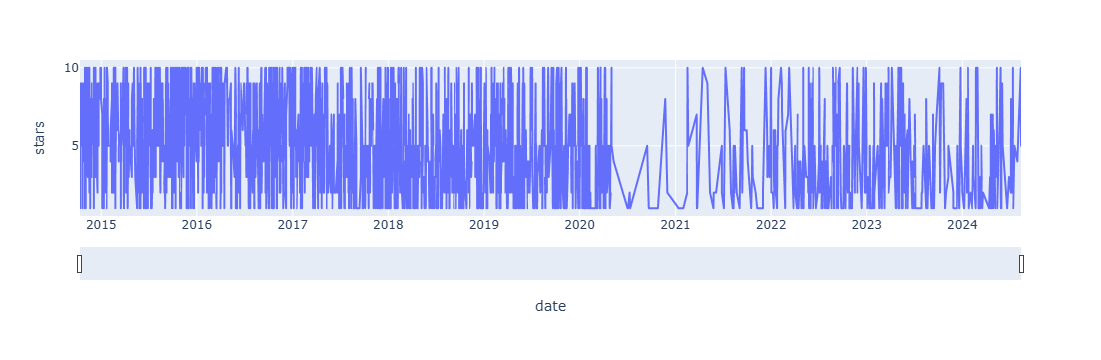

In [10]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

#### The ratings got reduced from mid March to mid May in 2024
#### Also , ratings got reduced specially in holiday months i.e May,June

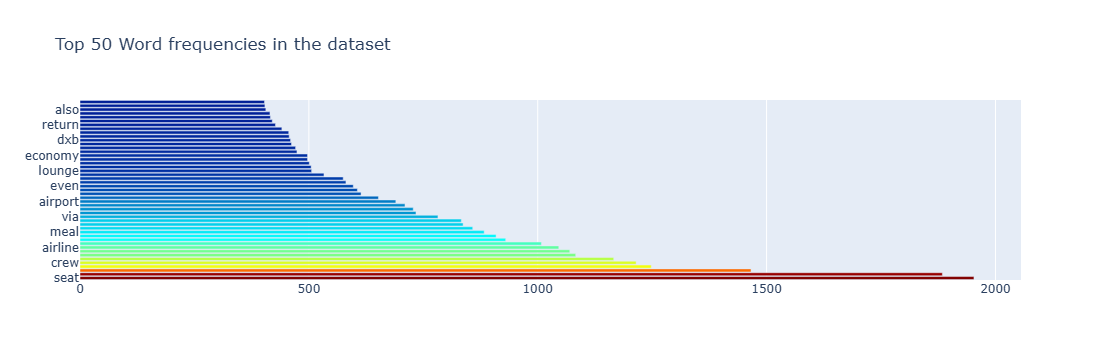

In [11]:
all_words = df['corpus'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.values[3:50],
            y = all_words.index.values[3:50],
            marker= dict(colorscale='Jet',color = all_words.values[3:100]),
            orientation= 'h',
    )]
layout = go.Layout(title='Top 50 Word frequencies in the dataset',height =1000,)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

* This chart provides valuable insights into customer feedback by highlighting the most frequently discussed topics. 
#### We observe that "seat" is the most frequently mentioned aspect, followed by "service," "food," and "staff."

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Darrin
[nltk_data]     DeYoung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


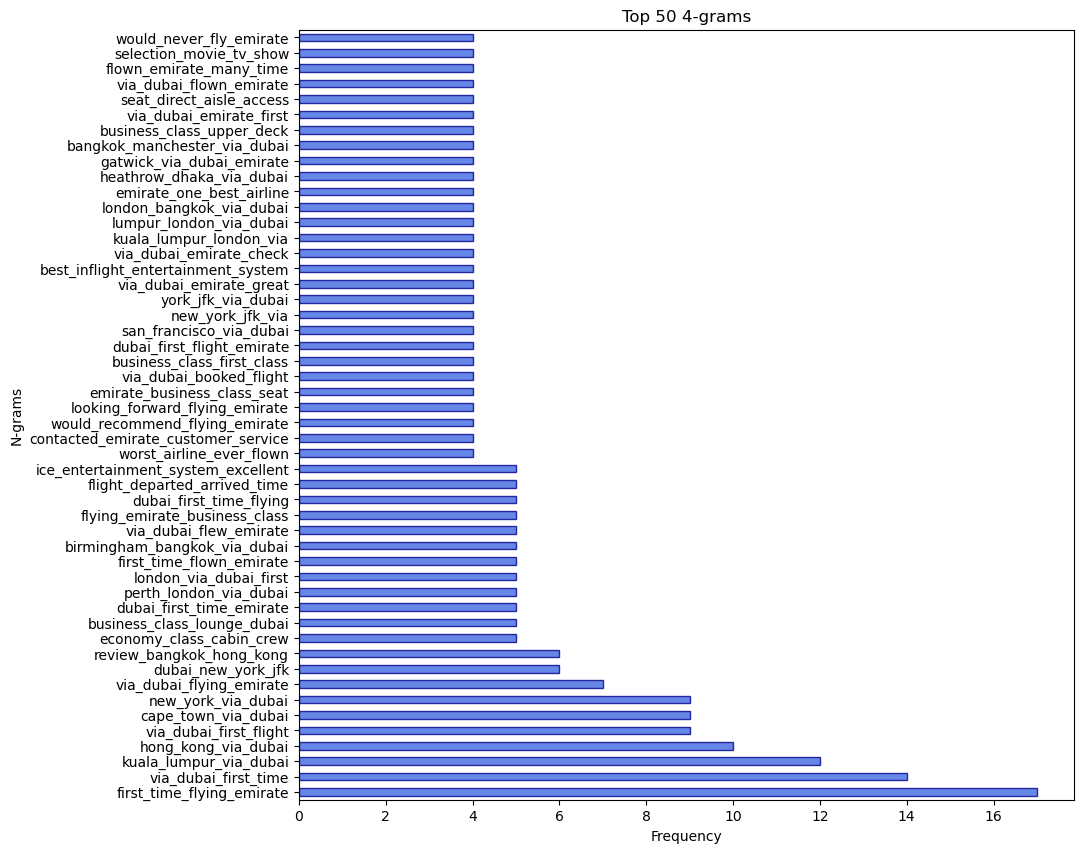

In [19]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords

reviews = " ".join(df['corpus'])

#split the text of all reviews into a list of words
words = reviews.split()
new_words = [word for word in words if word.lower() not in stop_words]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams_list = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(50)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1],reverse=True)}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1],reverse=True)}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh", color='royalblue', edgecolor='darkblue',alpha=0.8)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('N-grams')
    ax.set_title(f'Top 50 {number_of_ngrams}-grams')
    plt.show()
    #return ax


get_freq_dist(new_words,4)

#### Our analysis reveals that a significant portion of travelers are "first-time passengers" with Emirates. 
#### Additionally, many reviewers highlight the "exceptional in-flight entertainment system", noting it as one of the standout features of their journey.

#### By categorizing reviews based on ratings, we can better understand the sentiment associated with different levels of experience. For instance, we could group ratings as follows: 
#### ratings 1-3 : negative experiences, ratings 4-7: average to good experiences, and ratings 8-10 represent exceptional experiences.
#### This method allows us to explore how word frequencies vary across different levels of satisfaction, offering a clearer picture of customer sentiments.

In [20]:
ratings_1_3 = df[df['stars'].isin([1,2,3])]
ratings_4_7 = df[df['stars'].isin([4,5,6,7])]
ratings_8_10 = df[df['stars'].isin([8,9,10])]

In [21]:
reviews_1_3 = " ".join(ratings_1_3['corpus'])
reviews_4_7 = " ".join(ratings_4_7['corpus'])
reviews_8_10 = " ".join(ratings_8_10['corpus'])

In [22]:
#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_7 = reviews_4_7.split(" ")
words_8_10 = reviews_8_10.split(" ")

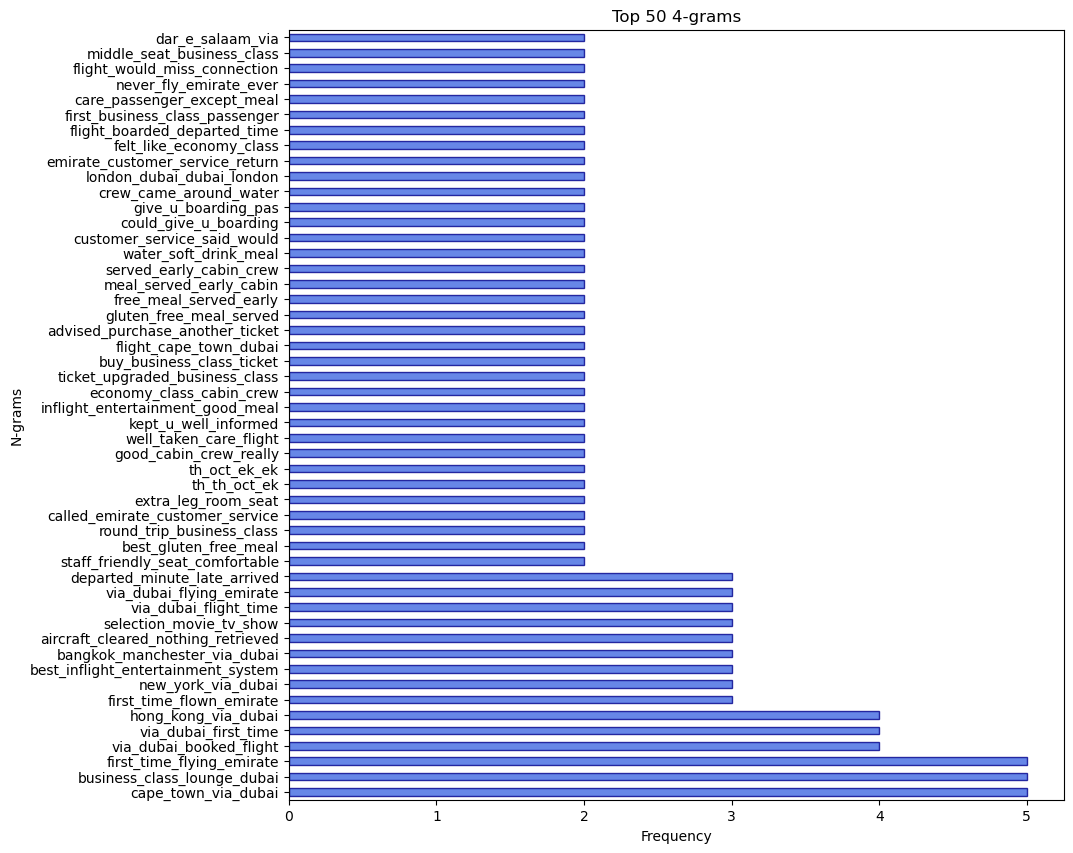

In [23]:
new_words_1_3 = [word for word in words_1_3 if word not in stop_words]
get_freq_dist(new_words_1_3, 4)

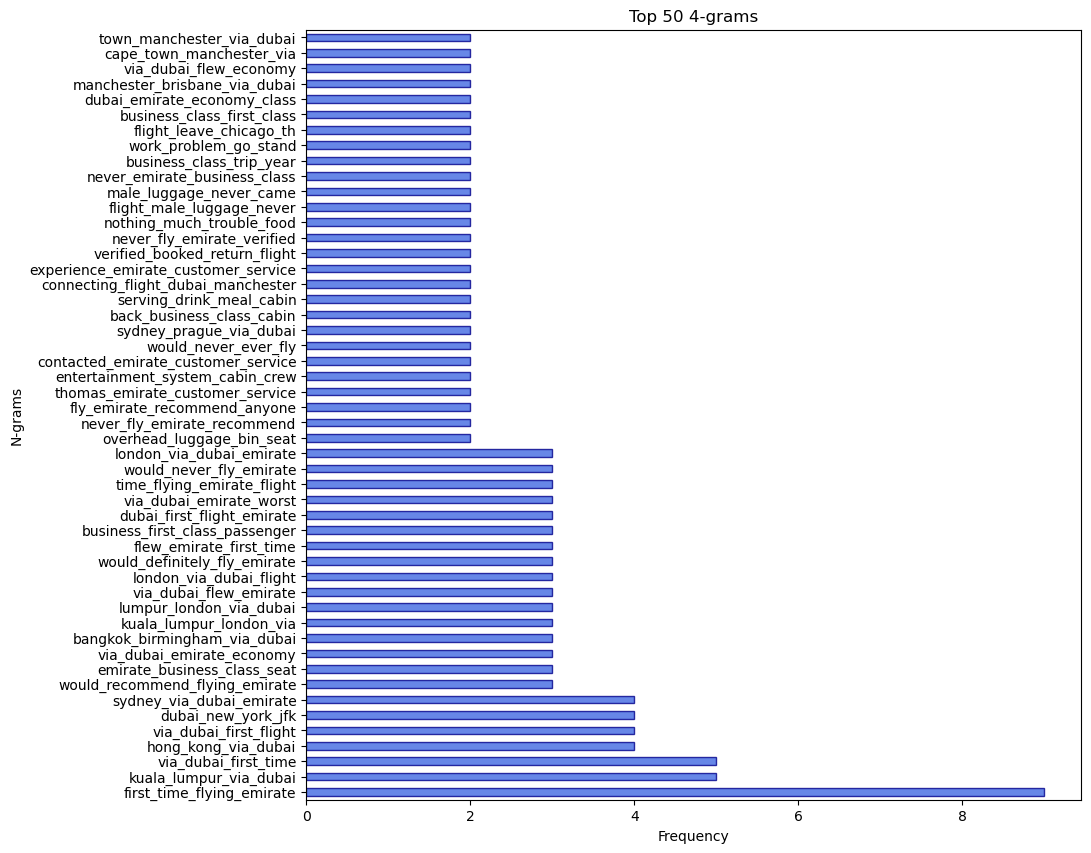

In [24]:
new_words_4_7 = [word for word in words_4_7 if word not in stop_words]
get_freq_dist(new_words_4_7, 4)

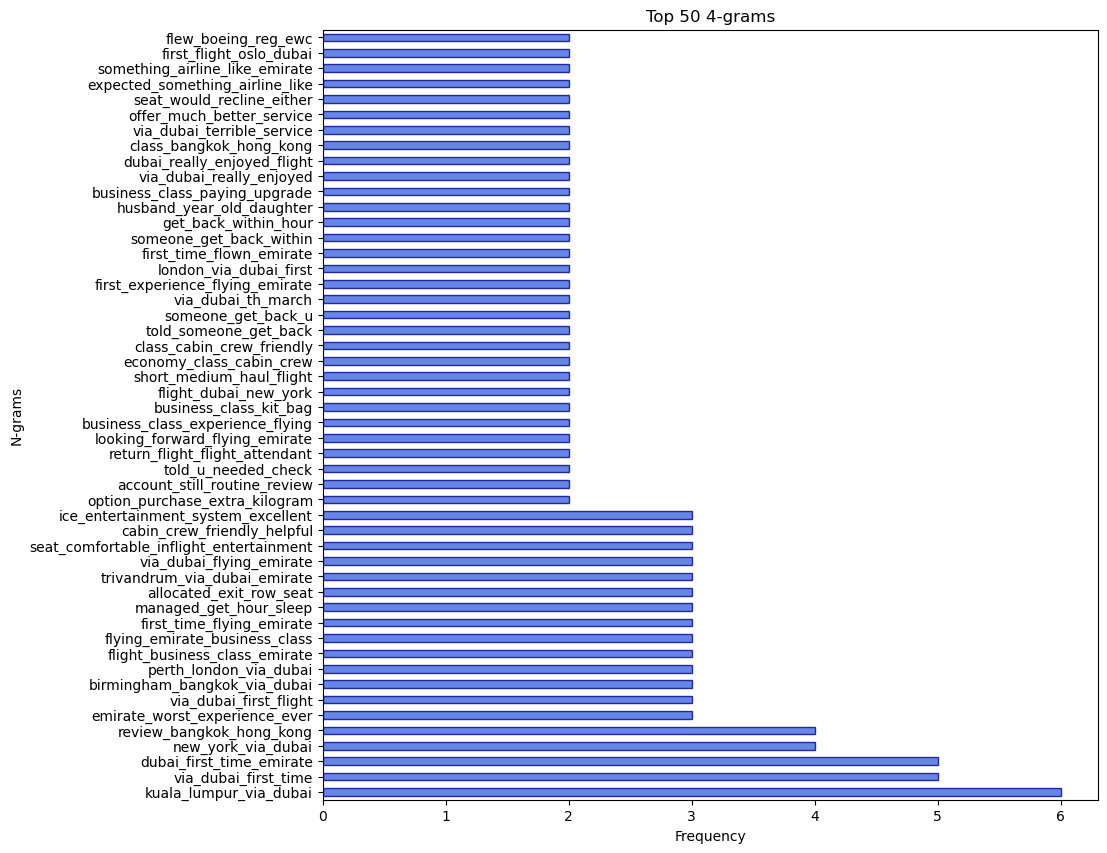

In [25]:
new_words_8_10 = [word for word in words_8_10 if word not in stop_words]
get_freq_dist(new_words_8_10, 4)

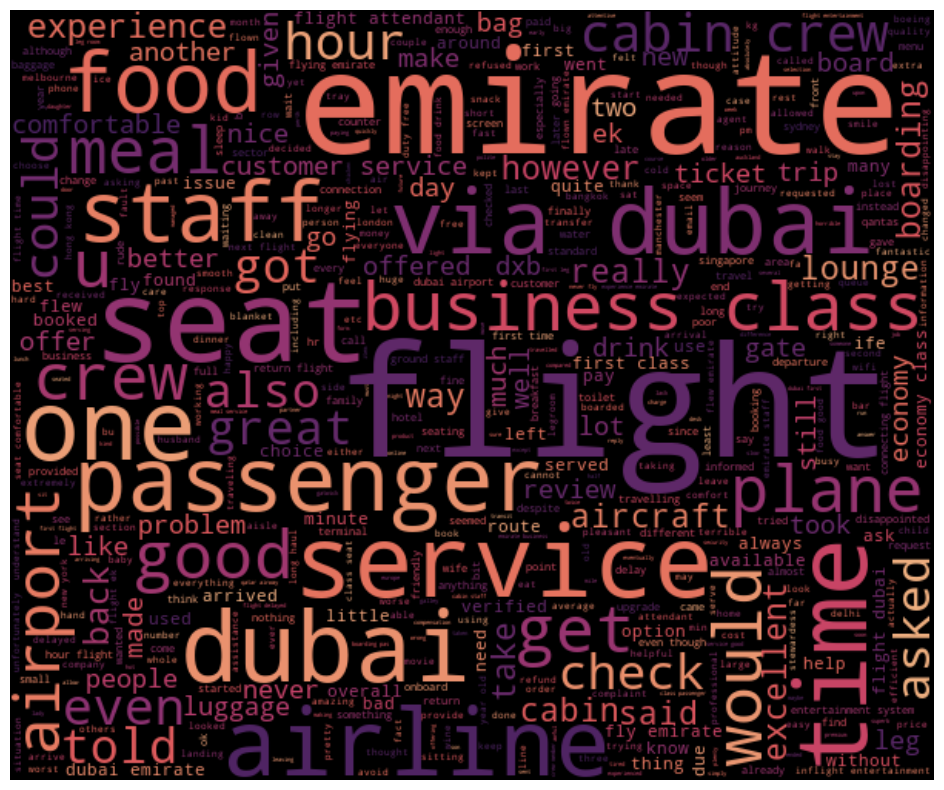

In [26]:
from wordcloud import WordCloud 

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=600,max_font_size=100, max_words=500, 
stopwords=stop_words,background_color="black",colormap='flare').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Rest analysis is done through Sentiment Analysis